# 상품 정시 배송 예측 프로젝트

## (1) 프로젝트 개요

#### 데이터 출처
https://www.kaggle.com/prachi13/customer-analytics

#### Feature 구성

- ID: 고객 번호
- Warehouse block: 창고 구역
- Mode of shipment: 운송 수단
- Customer care calls: 고객 응답 횟수
- Customer rating: 고객 만족 점수
- Cost of the product: 상품 비용
- Prior purchases: 이전 구매액
- Product importance: 상품 중요도
- Gender: 성별
- Discount offered: 할인액
- Weight in gms: 상품 무게
- Reached on time: 상품 정시 도착 여부(0: 성공 / 1: 실패)


## (2) EDA 및 데이터 전처리

### 2-1. 데이터 불러오기

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Train.csv')
df.head(3)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1


### 2-2. 데이터 탐색

In [3]:
df.shape

(10999, 12)

In [4]:
# 컬럼별 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
# 수치형 데이터에 대한 전체적인 통계량 확인
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


### 2-3. 데이터 전처리

#### 결측값 처리

In [6]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

#### 중복값 처리

In [7]:
df.duplicated().sum()

0

#### 컬럼명 수정

In [8]:
df = df.rename(columns = {"Reached.on.Time_Y.N":"Reached_on_Time_Y_N"})

### 2-4. Target Feature 정의

#### Target 데이터 탐색

In [9]:
df.groupby('Reached_on_Time_Y_N').mean()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
Reached_on_Time_Y_N,,,,,,,
0,7090.479486,4.147656,2.967989,214.498647,3.670424,5.545987,4168.668395
1,4424.978364,3.991467,3.005790,207.289197,3.498095,18.663721,3272.640104


In [10]:
y = df['Reached_on_Time_Y_N'].copy()
y.value_counts()

1    6563
0    4436
Name: Reached_on_Time_Y_N, dtype: int64

In [11]:
import seaborn as sns
from matplotlib import pyplot as plt

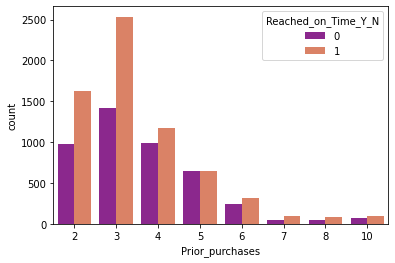

In [12]:
# 이전 구매횟수별 Target Feature 시각화

sns.countplot(x ="Prior_purchases", data=df, palette="plasma", hue="Reached_on_Time_Y_N")
plt.show()

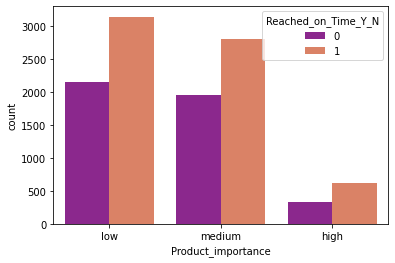

In [13]:
# 상품 중요도별 Target Feature 시각화

sns.countplot(x = "Product_importance", data=df, palette="plasma", hue="Reached_on_Time_Y_N");
plt.show()

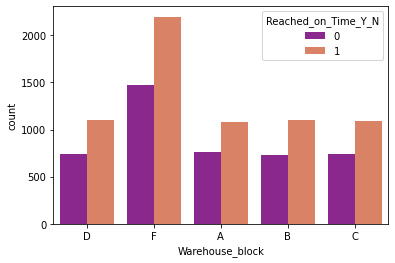

In [14]:
# 창고 구역별 Target Feature 시각화

sns.countplot(x="Warehouse_block", data=df, palette="plasma", hue="Reached_on_Time_Y_N")
plt.show()

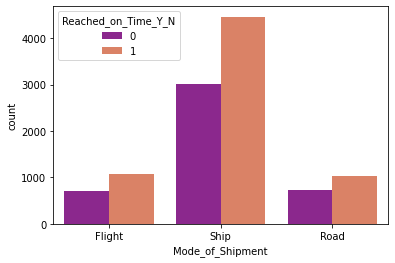

In [15]:
# 운송 수단별 Target Feature

sns.countplot(x="Mode_of_Shipment", data=df, palette="plasma", hue="Reached_on_Time_Y_N");
plt.show()

### 2-5. 데이터 타입별 Feature 변환

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached_on_Time_Y_N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [17]:
print("범주형 Feature 수 :", len(df.select_dtypes(include=['object']).columns))
print("수치형 Feature 수 :", len(df.select_dtypes(include=['int64']).columns))

범주형 Feature 수 : 4
수치형 Feature 수 : 8


#### 범주형 데이터

In [18]:
df.select_dtypes(include=['object']).head()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,D,Flight,low,F
1,F,Flight,low,M
2,A,Flight,low,M
3,B,Flight,medium,M
4,C,Flight,medium,F


In [19]:
df_cate_col = df.select_dtypes('object').columns.values
df_cate = df[df_cate_col].copy()
print(df_cate.nunique().sort_values())

Gender                2
Mode_of_Shipment      3
Product_importance    3
Warehouse_block       5
dtype: int64


In [20]:
df_cate.head()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,D,Flight,low,F
1,F,Flight,low,M
2,A,Flight,low,M
3,B,Flight,medium,M
4,C,Flight,medium,F


In [21]:
df_cate_encoded = pd.get_dummies(df_cate)
df_cate_encoded.head()

,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,0,0,0,1,0,1,0,0,0,1,0,1,0
1,0,0,0,0,1,1,0,0,0,1,0,0,1
2,1,0,0,0,0,1,0,0,0,1,0,0,1
3,0,1,0,0,0,1,0,0,0,0,1,0,1
4,0,0,1,0,0,1,0,0,0,0,1,1,0


#### 수치형 데이터

In [22]:
df.select_dtypes(include=['int64']).head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached_on_Time_Y_N
0,1,4,2,177,3,44,1233,1
1,2,4,5,216,2,59,3088,1
2,3,2,2,183,4,48,3374,1
3,4,3,3,176,4,10,1177,1
4,5,2,2,184,3,46,2484,1


In [23]:
df_num_col = df.select_dtypes(include=['int64']).columns.values
df_num = df[df_num_col]
df_num.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached_on_Time_Y_N
0,1,4,2,177,3,44,1233,1
1,2,4,5,216,2,59,3088,1
2,3,2,2,183,4,48,3374,1
3,4,3,3,176,4,10,1177,1
4,5,2,2,184,3,46,2484,1


In [24]:
df_num.nunique().sort_values()

Reached_on_Time_Y_N        2
Customer_rating            5
Customer_care_calls        6
Prior_purchases            8
Discount_offered          65
Cost_of_the_Product      215
Weight_in_gms           4034
ID                     10999
dtype: int64

In [25]:
df.shape

(10999, 12)

In [26]:
# 한 가지 값만을 가진 Feature 삭제: 'ID', 
# Target Feature 삭제: 'Reached_on_Time_Y_N'

df_num = df_num.drop(['ID', 'Reached_on_Time_Y_N'], axis=1)

### 2-6. 상관성에 따른 Feature 정제

#### 범주형 데이터

* Crammer V 상관계수를 통하여 범주형 컬럼들 사이의 상관 관계를 확인합니다.
* 두 가지 컬럼 사이에서 상관계수가 0.9 이상으로 나올 경우, 다중공선성 우려가 있으므로 둘 중 하나를 삭제합니다.

In [34]:
df_cate_encoded.nunique().sort_values()

Warehouse_block_A            2
Warehouse_block_B            2
Warehouse_block_C            2
Warehouse_block_D            2
Warehouse_block_F            2
Mode_of_Shipment_Flight      2
Mode_of_Shipment_Road        2
Mode_of_Shipment_Ship        2
Product_importance_high      2
Product_importance_low       2
Product_importance_medium    2
Gender_F                     2
Gender_M                     2
dtype: int64

In [35]:
df_cate_encoded.head()

,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,0,0,0,1,0,1,0,0,0,1,0,1,0
1,0,0,0,0,1,1,0,0,0,1,0,0,1
2,1,0,0,0,0,1,0,0,0,1,0,0,1
3,0,1,0,0,0,1,0,0,0,0,1,0,1
4,0,0,1,0,0,1,0,0,0,0,1,1,0


In [37]:
import numpy as np
from itertools import combinations
from scipy.stats import chi2_contingency

In [38]:
# * reference code 출처 : https://www.kaggle.com/chrisbss1/cramer-s-v-correlation-matrix

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

rows= []

for var1 in df_cate_encoded:
  col = []
  for var2 in df_cate_encoded :
    cramers =cramers_V(df_cate_encoded[var1], df_cate_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
corr_df_cate = pd.DataFrame(cramers_results, columns = df_cate_encoded.columns, index = df_cate_encoded.columns)

corr_df_cate.head()

,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
Warehouse_block_A,1.00,0.04,0.04,0.04,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Warehouse_block_B,0.04,1.00,0.04,0.04,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Warehouse_block_C,0.04,0.04,1.00,0.04,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Warehouse_block_D,0.04,0.04,0.04,1.00,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Warehouse_block_F,0.10,0.10,0.10,0.10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
np.sum(corr_df_cate > 0.9)

Warehouse_block_A            1
Warehouse_block_B            1
Warehouse_block_C            1
Warehouse_block_D            1
Warehouse_block_F            1
Mode_of_Shipment_Flight      1
Mode_of_Shipment_Road        1
Mode_of_Shipment_Ship        1
Product_importance_high      1
Product_importance_low       1
Product_importance_medium    1
Gender_F                     2
Gender_M                     2
dtype: int64

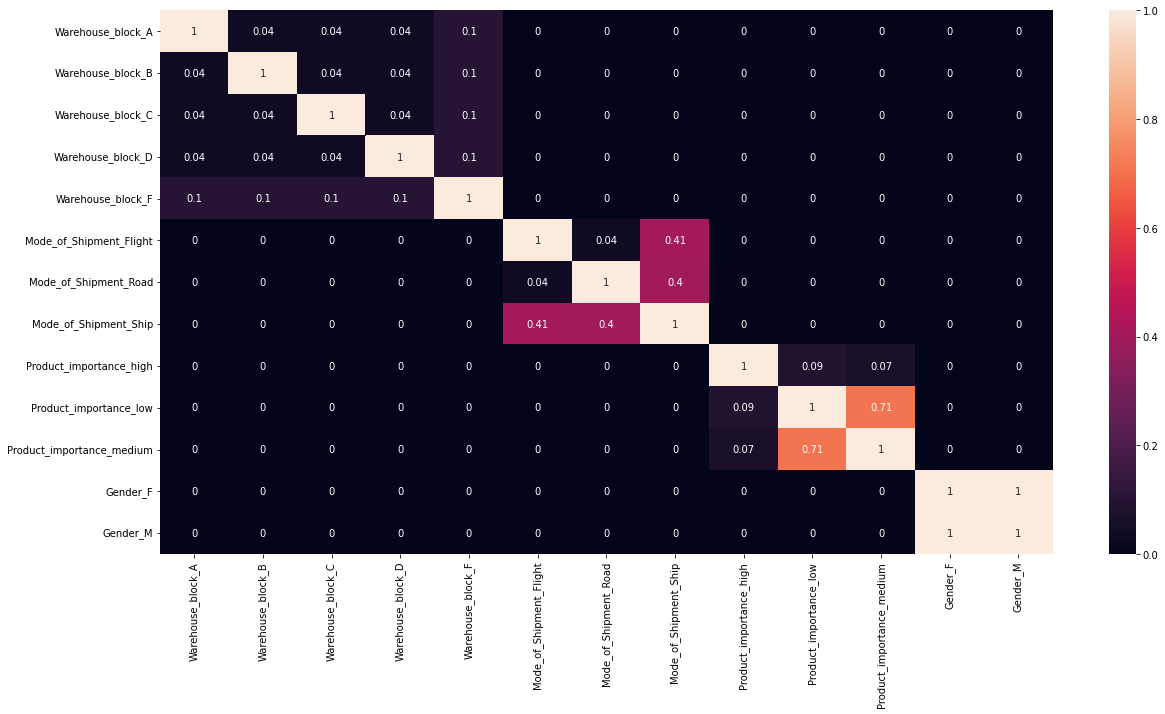

In [40]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_df_cate, annot=True);

* 계산 결과, 0.9이상의 상관계수가 나타나는 조합은 없었습니다. 따라서 범주형 데이터에서는 삭제해야 할 컬럼 조합이 없다고 판단합니다.

#### 수치형 데이터

* Pearson 상관계수를 통하여 수치형 컬럼들 사이의 상관 관계를 확인합니다.
* 두 가지 컬럼 사이에서 상관계수가 0.9 이상으로 나올 경우, 다중공선성 우려가 있으므로 둘 중 하나를 삭제합니다.

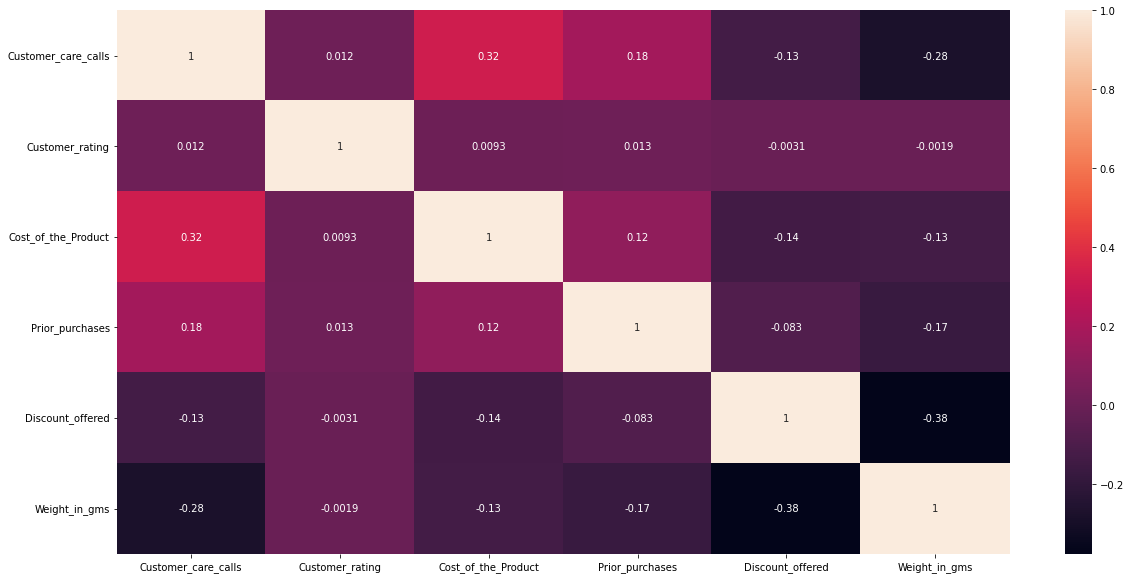

In [41]:
corr = df_num.corr()

plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True);

* 계산 결과, 0.9이상의 상관계수가 나타나는 조합은 없었습니다. 따라서 수치형 데이터에서도 삭제해야 할 컬럼 조합이 없다고 판단합니다.

#### 데이터 병합

In [42]:
Train = pd.concat([df_num, df_cate_encoded], axis=1)

In [43]:
Train.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,4,2,177,3,44,1233,0,0,0,1,0,1,0,0,0,1,0,1,0
1,4,5,216,2,59,3088,0,0,0,0,1,1,0,0,0,1,0,0,1
2,2,2,183,4,48,3374,1,0,0,0,0,1,0,0,0,1,0,0,1
3,3,3,176,4,10,1177,0,1,0,0,0,1,0,0,0,0,1,0,1
4,2,2,184,3,46,2484,0,0,1,0,0,1,0,0,0,0,1,1,0


### 2-7. Target Feature 불균형 문제 처리

#### 불균형 데이터 확인

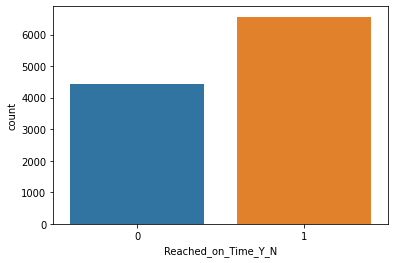

In [44]:
sns.countplot(x='Reached_on_Time_Y_N', data=df);

#### SMOTE를 이용한 오버샘플링

In [45]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [46]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached_on_Time_Y_N'],
      dtype='object')

In [47]:
target = df["Reached_on_Time_Y_N"]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(Train, target, test_size=0.2, random_state=13);

In [49]:
sm = SMOTE(random_state=13)
smote_train, smote_target = sm.fit_resample(X_train, y_train)

## (3) 머신러닝 모델링

### 3-1. Logistic Regression 분류 모델

#### 모델 학습

In [50]:
from sklearn.linear_model import LogisticRegression

In [53]:
model = LogisticRegression()
model.fit(smote_train, smote_target)
lr_predictions = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#### 모델 성능 측정

In [54]:
from sklearn.metrics import accuracy_score, classification_report

In [55]:
print("Accuracy score: {}".format(accuracy_score(y_test, lr_predictions)))
print("="*60)
print(classification_report(y_test, lr_predictions))

Accuracy score: 0.6522727272727272
              precision    recall  f1-score   support

           0       0.56      0.69      0.62       899
           1       0.75      0.62      0.68      1301

    accuracy                           0.65      2200
   macro avg       0.65      0.66      0.65      2200
weighted avg       0.67      0.65      0.66      2200



### 3-2. RandomForest 분류 모델

#### GridSearchCV를 이용한 최적의 하이퍼파라미터 탐색

In [56]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [57]:
rf_params = { 
    'n_estimators' : [10, 100],
    'max_depth' : [4, 8, 10, 12],
    'min_samples_leaf' : [2, 4, 8, 12],
    'max_features' : [0.1, 0.3, 0.5]
}

# RandomForest Classifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=rf_params, cv=3, n_jobs=-1)
grid_cv.fit(smote_train, smote_target)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 4, 'max_features': 0.5, 'min_samples_leaf': 12, 'n_estimators': 100}
최고 예측 정확도: 0.7296


In [58]:
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 100, 
    'max_features': 0.5,
    'max_depth': 4,
    'min_samples_leaf': 12,
    'random_state' : 13,
    'verbose': 0
}

In [59]:
rf = RandomForestClassifier(**rf_params)

#### 모델 성능 측정

In [60]:
rf.fit(smote_train, smote_target)
rf_predictions = rf.predict(X_test)

print("Accuracy score: {}".format(accuracy_score(y_test, rf_predictions)))
print("="*60)
print(classification_report(y_test, rf_predictions))

Accuracy score: 0.7054545454545454
              precision    recall  f1-score   support

           0       0.58      0.98      0.73       899
           1       0.97      0.52      0.67      1301

    accuracy                           0.71      2200
   macro avg       0.78      0.75      0.70      2200
weighted avg       0.81      0.71      0.70      2200



### 3-3. Gradient Boosting 분류 모델

#### GridSearchCV를 이용한 최적의 하이퍼파라미터 탐색

In [61]:
gb_params = { 
    'n_estimators' : [1000, 1500],
    'max_depth' : [4, 6],
    'min_samples_leaf' : [2, 4],
    'max_features' : [0.7, 0.9],
    'learning_rate' : [0.25,0.3]
}

# RandomForest Classifier 객체 생성 후 GridSearchCV 수행
gb_clf = GradientBoostingClassifier(random_state = 0)
grid_cv = GridSearchCV(gb_clf, param_grid = gb_params, cv = 3, n_jobs = -1)
grid_cv.fit(smote_train, smote_target)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'learning_rate': 0.25, 'max_depth': 6, 'max_features': 0.9, 'min_samples_leaf': 2, 'n_estimators': 1500}
최고 예측 정확도: 0.6675


In [62]:
# Gradient Boosting Parameters
gb_params = {
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'random_state' : 13,
    'verbose': 0
}

In [63]:
gb = GradientBoostingClassifier(**gb_params)
gb.fit(smote_train, smote_target)
gb_predictions = gb.predict(X_test)

#### 모델 성능 측정

In [64]:
print("Accuracy score: {}".format(accuracy_score(y_test, gb_predictions)))
print("="*60)
print(classification_report(y_test, gb_predictions))

Accuracy score: 0.665
              precision    recall  f1-score   support

           0       0.58      0.63      0.61       899
           1       0.73      0.69      0.71      1301

    accuracy                           0.67      2200
   macro avg       0.66      0.66      0.66      2200
weighted avg       0.67      0.67      0.67      2200



## (4) 결과 해석

### 4-1. RandomForest 모델링 요인 분석

In [65]:
important_features = pd.Series(data=rf.feature_importances_, index=Train.columns.values)
important_features.sort_values(ascending=False).head()

Discount_offered       0.626809
Weight_in_gms          0.196669
Gender_F               0.046777
Prior_purchases        0.038196
Cost_of_the_Product    0.017320
dtype: float64

RandomForest의 모델링 과정에서 영향력이 높았던 feature들을 분석했을 때, 할인액, 상품 무게, 고객의 성별(여성) 등의 순서대로 상품 정시 배송 여부에 커다란 영향을 주었음이 나타났습니다.

### 4-2. Gradient Boosting 모델링 요인 분석

In [66]:
important_features = pd.Series(data=gb.feature_importances_, index=Train.columns.values)
important_features.sort_values(ascending=False).head()

Discount_offered       0.334829
Weight_in_gms          0.263511
Cost_of_the_Product    0.121736
Prior_purchases        0.036217
Gender_F               0.035568
dtype: float64

Gradient Boosting 모델링 과정에서 영향력이 높았던 feature들을 분석했을 때, 할인액, 상품의 무게 및 가격 순으로 정시 상품 배송에 영향을 준 것으로 나타났습니다.

로지스틱 회귀의 경우 feature_importances_ 메소드가 지원되지 않기 때문에 요인 분석에서 제외했습니다.
Random Forest와 Gradient Boosting 모델링을 통한 예측 결과를 종합했을 때, 할인액이 상품 정시 배송에 가장 큰 영향을 주는 요인이었습니다. 즉, 할인액이 높은 상품들은  정시에 배송될 가능성이 높다고 볼 수 있습니다. 이와 함께 '상품 무게'와 '고객의 성별(여성)', '상품 가격'도 중요한 요인으로 나타난 점을 고려했을 때, 무게가 많이 나가고 가격대가 높은 상품인 가전제품군이 이 회사에서 정시 배송될 가능성이 높은 제품군이라는 것을 추측해볼 수 있습니다.